In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
id_to_label = {
    80676829: 'Krzysztof Bosak',
    955239446: 'Władysław Kosiniak-Kamysz',
    2280346687: 'Małgorzata Kidawa-Błońska',
    1193947151971311618: 'Szymon Hołownia',
    202086424: 'Andrzej Duda',
    466781777: 'Robert Biedroń'}

candidates_ids = [key for key in id_to_label.keys()]

# Daily stats

In [ ]:
stats_file = 'daily-stats.csv'

In [4]:
def read_stats():
    df = pd.read_csv(stats_file, sep='\t')
    df['date'] = pd.to_datetime(df.date, format='%d/%m/%Y')
    df = df.sort_values(by='date', ascending=False)
    df['date'] = df['date'].apply(lambda x: x.strftime('%d/%m/%Y'))
    return df

# read_stats()

## Display

In [14]:
def display_stats(days=3):
    df = read_stats() \
        .replace({"profile": id_to_label}) \
        .set_index(['profile']) \
        .groupby(['profile']) \
        .tail(days) \
        .groupby(['profile']) \
        .apply(lambda x: x.set_index('date'))
    return df

def display_growth_per_day(days=3):
    df = read_stats() \
        .replace({"profile": id_to_label}) \
        .set_index(['profile']) \
        .groupby(['profile']) \
        .apply(lambda x: x.set_index('date').diff()) \
        .groupby(['profile']) \
        .tail(days)
    return df

In [15]:
# display_stats()

followers  following  tweets
profile                   date                                    
Andrzej Duda              15/03/2020    1083101        767    7654
                          14/03/2020    1079046        767    7653
                          13/03/2020    1077292        767    7653
Krzysztof Bosak           15/03/2020     164115       2501   98004
                          14/03/2020     163699       2499   97937
                          13/03/2020     163547       2498   97905
Małgorzata Kidawa-Błońska 15/03/2020      83452        522    3670
                          14/03/2020      81604        522    3669
                          13/03/2020      80878        522    3667
Robert Biedroń            15/03/2020     210642       1897   16758
                          14/03/2020     209558       1897   16748
                          13/03/2020     209142       1897   16739
Szymon Hołownia           15/03/2020      20228        202     448
                          14/03/2020      19897        202     431
                          13/03/2020      19772        202     423
Władysław Kosiniak-Kamysz 15/03/2020      93446       1248    7691
                          14/03/2020      92619       1248    7685
                          13/03/2020      92289       1248    7680

In [16]:
# display_growth_per_day()

followers  following  tweets
profile                   date                                    
Andrzej Duda              15/03/2020    -2139.0        0.0    -1.0
                          14/03/2020    -4055.0        0.0    -1.0
                          13/03/2020    -1754.0        0.0     0.0
Krzysztof Bosak           15/03/2020     -193.0       -2.0   -29.0
                          14/03/2020     -416.0       -2.0   -67.0
                          13/03/2020     -152.0       -1.0   -32.0
Małgorzata Kidawa-Błońska 15/03/2020     -831.0        0.0    -2.0
                          14/03/2020    -1848.0        0.0    -1.0
                          13/03/2020     -726.0        0.0    -2.0
Robert Biedroń            15/03/2020     -494.0       -1.0    -5.0
                          14/03/2020    -1084.0        0.0   -10.0
                          13/03/2020     -416.0        0.0    -9.0
Szymon Hołownia           15/03/2020     -299.0        0.0    -5.0
                          14/03/2020     -331.0        0.0   -17.0
                          13/03/2020     -125.0        0.0    -8.0
Władysław Kosiniak-Kamysz 15/03/2020     -409.0        0.0    -2.0
                          14/03/2020     -827.0        0.0    -6.0
                          13/03/2020     -330.0        0.0    -5.0

## Plot

In [24]:
def plot_follower_growth_per_day(from_date='20/03/2020', till_date='02/04/2020'):
    data = read_stats()
    stats_df = data.set_index(['profile', 'date'])
    diffs = stats_df.groupby(['profile']) \
            .apply(lambda x: x.diff(periods=-1)) \
            .reset_index() \
            .set_index(['profile']) \
            .groupby(['profile']) \
            .apply(lambda x: x.set_index('date').loc[till_date: from_date])
    
    fig, ax = plt.subplots(figsize=(15, 5))
    title = 'Dzienny przyrost followersów'
    
    diffs = diffs.reset_index().replace({"profile": id_to_label}).set_index(['profile'])
    
    diffs['date'] = pd.to_datetime(diffs.date, format='%d/%m/%Y')
    diffs = diffs.sort_values(by='date', ascending=True)
    diffs['date'] = diffs['date'].apply(lambda x: x.strftime('%d/%m/%Y'))

    for profile, df in diffs.groupby('profile'):
        _ = ax.plot(df['date'], df['followers'], label=profile, marker='.')
    _ = ax.legend(loc='upper left')
    _ = ax.set_title(title)

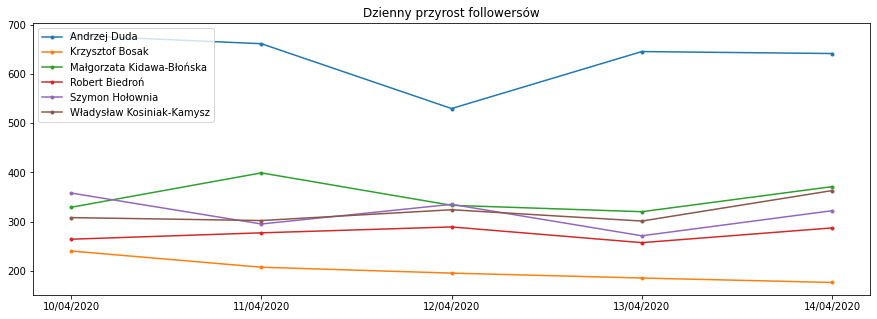

In [25]:
# plot_follower_growth_per_day('10/04/2020', '14/04/2020')